In [1]:
# Importing libraries

import requests
from datetime import datetime
import traceback
import json
import sys
import praw
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
import arrow

In [2]:
# Scraping data for subreddit "r/emacs" [01/01/2020 - 03/31/2020]

def downloadSubreddit(filename, subreddit, start_time, end_time):
    submissions = []
    count = 0
    submissions_with_metrics = []
    previous_epoch = int(start_time.timestamp())
    after_epoch = int(end_time.timestamp())
    print(after_epoch)
    print(previous_epoch)
    
    
    url = 'https://api.pushshift.io/reddit/submission/search/?subreddit={}&after={}&before={}&sort=desc&limit=1000'
    reddit = praw.Reddit(client_id='_87SCviJLvIICA', client_secret='yio0cnfuq97lMDQRPfvXSfje-O-z_Q', user_agent='redditdataanalysis')
    
    while True:
        new_url = url.format(subreddit, after_epoch, previous_epoch)
        json_text = requests.get(new_url, headers={'User-Agent': "Post downloader by /u/nsajnani"})
        time.sleep(1)  # pushshift has a rate limit, if we send requests too fast it will start returning error messages
        try:
            json_data = json_text.json()
        except json.decoder.JSONDecodeError:
            time.sleep(1)
            continue

        if 'data' not in json_data:
            break
        objects = json_data['data']
        if len(objects) == 0:
            break

        for object in objects:
            previous_epoch = object['created_utc'] - 1
            count += 1
            praw_submission = reddit.submission(id=object['id'])
            submissions_with_metrics.append([praw_submission.author, praw_submission.title, praw_submission.upvote_ratio, praw_submission.is_original_content, praw_submission.edited, praw_submission.score, praw_submission.id, praw_submission.subreddit, praw_submission.url, praw_submission.num_comments, praw_submission.selftext, praw_submission.created])


        print("Saved {} submissions through {}".format(count, datetime.fromtimestamp(previous_epoch).strftime("%Y-%m-%d")))

    print(f"Saved {count} submissions")
    submissions_with_metrics = pd.DataFrame(submissions_with_metrics,columns=['author','title', 'upvote_ratio','is_original_content','edited','score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    submissions_with_metrics.to_csv(filename, index=False)


downloadSubreddit("submissions_with_metrics_emacs.csv", "emacs", datetime(2020, 3, 31), datetime(2020, 1, 1))


1577817000
1585593000
Saved 100 submissions through 2020-03-24
Saved 200 submissions through 2020-03-17
Saved 300 submissions through 2020-03-09
Saved 400 submissions through 2020-03-03
Saved 500 submissions through 2020-02-24
Saved 600 submissions through 2020-02-18
Saved 700 submissions through 2020-02-10
Saved 800 submissions through 2020-02-03
Saved 900 submissions through 2020-01-28
Saved 1000 submissions through 2020-01-22
Saved 1100 submissions through 2020-01-16
Saved 1200 submissions through 2020-01-09
Saved 1300 submissions through 2020-01-03
Saved 1330 submissions through 2020-01-01
Saved 1330 submissions


In [3]:
# Scraping data for subreddit "r/vim" [01/01/2020 - 03/31/2020]

def downloadSubreddit(filename, subreddit, start_time, end_time):
    submissions = []
    count = 0
    submissions_with_metrics = []
    previous_epoch = int(start_time.timestamp())
    after_epoch = int(end_time.timestamp())
    print(after_epoch)
    print(previous_epoch)
    
    
    url = 'https://api.pushshift.io/reddit/submission/search/?subreddit={}&after={}&before={}&sort=desc&limit=1000'
    reddit = praw.Reddit(client_id='_87SCviJLvIICA', client_secret='yio0cnfuq97lMDQRPfvXSfje-O-z_Q', user_agent='redditdataanalysis')
    
    while True:
        new_url = url.format(subreddit, after_epoch, previous_epoch)
        json_text = requests.get(new_url, headers={'User-Agent': "Post downloader by /u/nsajnani"})
        time.sleep(1)  # pushshift has a rate limit, if we send requests too fast it will start returning error messages
        try:
            json_data = json_text.json()
        except json.decoder.JSONDecodeError:
            time.sleep(1)
            continue

        if 'data' not in json_data:
            break
        objects = json_data['data']
        if len(objects) == 0:
            break

        for object in objects:
            previous_epoch = object['created_utc'] - 1
            count += 1
            praw_submission = reddit.submission(id=object['id'])
            submissions_with_metrics.append([praw_submission.author, praw_submission.title, praw_submission.upvote_ratio, praw_submission.is_original_content, praw_submission.edited, praw_submission.score, praw_submission.id, praw_submission.subreddit, praw_submission.url, praw_submission.num_comments, praw_submission.selftext, praw_submission.created])


        print("Saved {} submissions through {}".format(count, datetime.fromtimestamp(previous_epoch).strftime("%Y-%m-%d")))

    print(f"Saved {count} submissions")
    submissions_with_metrics = pd.DataFrame(submissions_with_metrics,columns=['author','title', 'upvote_ratio','is_original_content','edited','score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    submissions_with_metrics.to_csv(filename, index=False)


downloadSubreddit("submissions_with_metrics_vim.csv", "vim", datetime(2020, 3, 31), datetime(2020, 1, 1))


1577817000
1585593000
Saved 100 submissions through 2020-03-23
Saved 200 submissions through 2020-03-15
Saved 300 submissions through 2020-03-06
Saved 400 submissions through 2020-02-27
Saved 500 submissions through 2020-02-19
Saved 600 submissions through 2020-02-11
Saved 700 submissions through 2020-02-03
Saved 800 submissions through 2020-01-25
Saved 900 submissions through 2020-01-18
Saved 1000 submissions through 2020-01-10
Saved 1100 submissions through 2020-01-01
Saved 1104 submissions through 2020-01-01
Saved 1104 submissions


In [4]:
# Reading CSV files into dataframes

df_emacs = pd.read_csv("submissions_with_metrics_emacs.csv") 
df_vim = pd.read_csv("submissions_with_metrics_vim.csv")

In [5]:
print("Data for subreddit 'emacs'")
df_emacs.head()

Data for subreddit 'emacs'


,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created
0,NaN,Is it possible to create vision boards on Emacs ?,1.00,False,False,12,frvy6n,emacs,https://www.reddit.com/r/emacs/comments/frvy6n...,12,[deleted],1.585621e+09
1,Ayrat555,I wrote a post about org-habit that can be use...,0.96,False,False,20,frvtk3,emacs,https://www.badykov.com/common/2020/03/29/a-ma...,3,NaN,1.585620e+09
2,PriorOutcome,View Minecraft Worlds in Emacs,0.96,False,False,73,frvtjg,emacs,https://www.reddit.com/r/emacs/comments/frvtjg...,13,&#x200B;\n\nhttps://preview.redd.it/y8w6lt7onu...,1.585620e+09
3,Hagge5,Getting rid of extraneous emacs bindings when ...,0.81,False,1585578458.0,6,frrny3,emacs,https://www.reddit.com/r/emacs/comments/frrny3...,18,"Hi,\n\nI'm attempting to learn evil-mode with ...",1.585607e+09
4,FormerAct,Effort estimate of parent header from subheaders,1.00,False,False,2,frrnd8,emacs,https://www.reddit.com/r/emacs/comments/frrnd8...,2,I am getting crazy in order to get this... Do ...,1.585607e+09


In [6]:
print("Data for subreddit 'vim'")
df_vim.head()

Data for subreddit 'vim'


,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created
0,justrajdeep,Titlestring format,0.67,False,False,1,fruugj,vim,https://www.reddit.com/r/vim/comments/fruugj/t...,1,Hi Vimmers\n\nCan someone please explain me ho...,1.585617e+09
1,justrajdeep,A Few Vim Plugins That Have Impressed Me Recently,0.42,False,False,0,frurk2,vim,https://www.youtube.com/watch?v=RGOsE3UWqhI,4,NaN,1.585617e+09
2,mugnozzo,Why I switched from Emacs to Vi(m),0.83,False,False,11,frsghk,vim,https://www.reddit.com/r/vim/comments/frsghk/w...,24,First of all: I've never taken part in the Vi(...,1.585610e+09
3,PresentPickleNinja,iI've gotten to the point where muscle memory ...,0.94,False,False,334,frqmx2,vim,https://www.reddit.com/r/vim/comments/frqmx2/i...,103,iI'm not kidding. It's becoming a problem.:wq,1.585603e+09
4,pouponne,For your best shopping experiences,1.00,False,False,1,frq7lp,vim,https://www.reddit.com/r/vim/comments/frq7lp/f...,1,[removed],1.585601e+09


Length of Data (emacs) : 1330
Length of Data (vim) : 1104


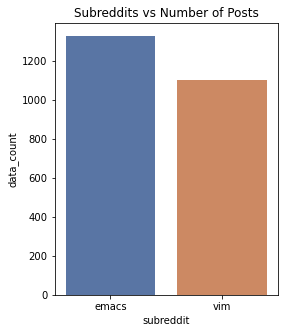

In [7]:
print("Length of Data (emacs) : " + str(len(df_emacs)))
print("Length of Data (vim) : " + str(len(df_vim)))

data = [['emacs', len(df_emacs)], ['vim', len(df_vim)]] 
df = pd.DataFrame(data, columns = ['subreddit', 'data_count'])

# Plotting number of posts in subreddits emacs and vim 

plt.figure(figsize=(4,5))
ax = sns.barplot(x="subreddit", y="data_count", data=df, palette="deep").set_title("Subreddits vs Number of Posts")

Number of Distinct Authors in 'emacs' : 671
Number of Distinct Authors in 'vim'   : 637


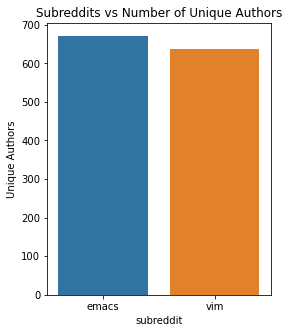

In [8]:
print("Number of Distinct Authors in 'emacs' : " + str(df_emacs['author'].nunique()))
print("Number of Distinct Authors in 'vim'   : " + str(df_vim['author'].nunique()))

data = [['emacs', df_emacs['author'].nunique()], ['vim', df_vim['author'].nunique()]] 
df = pd.DataFrame(data, columns = ['subreddit', 'Unique Authors'])

# Plotting number of posts in subreddits emacs and vim 

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,5))
ax = sns.barplot(x="subreddit", y="Unique Authors", data=df).set_title("Subreddits vs Number of Unique Authors")

Highest number of comments on emacs posts : 170


Text(0.5, 1.0, 'EMACS - Distribution of comments')

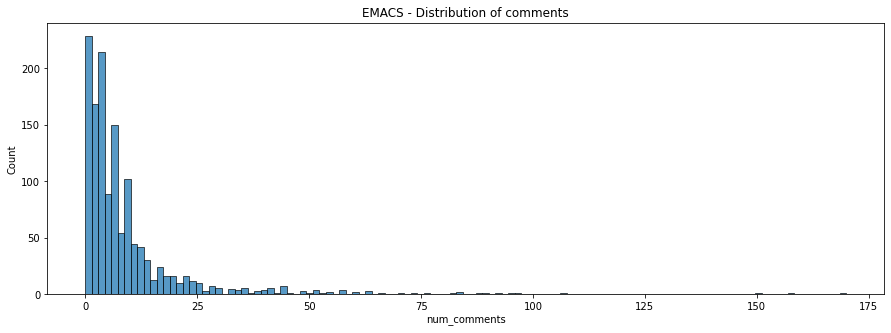

In [9]:
# Comments distribution in emacs subreddit

print("Highest number of comments on emacs posts : " + str(max(df_emacs['num_comments'])))

plt.figure(figsize=(15,5))
sns.histplot(data=df_emacs, x="num_comments").set_title("EMACS - Distribution of comments")

Highest number of comments on vim Posts : 195


Text(0.5, 1.0, 'VIM - Distribution of comments')

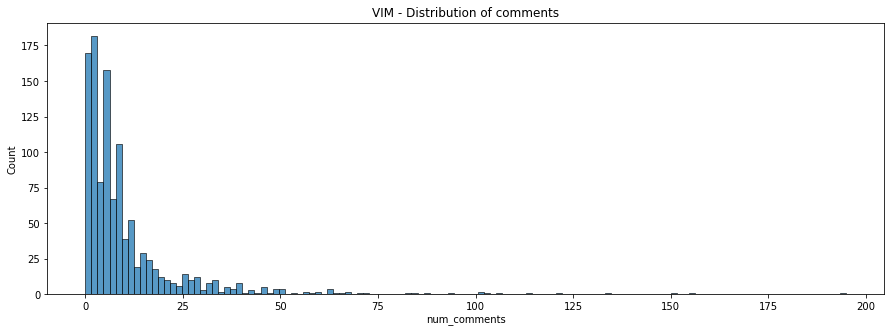

In [10]:
# Comments distribution in vim subreddit

print("Highest number of comments on vim Posts : " + str(max(df_vim['num_comments'])))

plt.figure(figsize=(15,5))
sns.histplot(data=df_vim, x="num_comments").set_title("VIM - Distribution of comments")

Text(0.5, 1.0, 'EMACS - Distribution of Score')

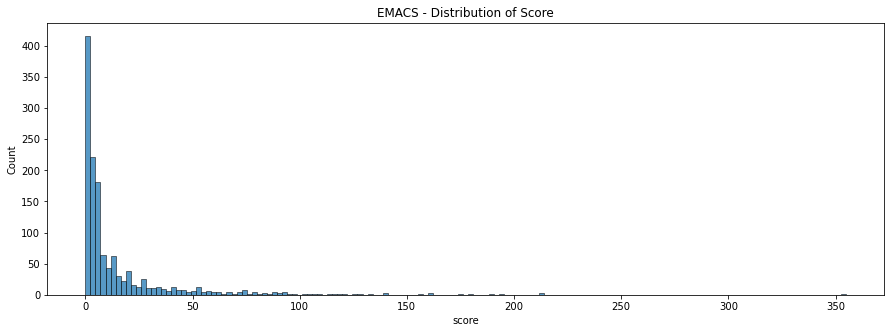

In [11]:
# Score distribution in emacs subreddit


plt.figure(figsize=(15,5))
sns.histplot(data=df_emacs, x="score").set_title("EMACS - Distribution of Score")

Highest number of score on VIM posts : 1253


Text(0.5, 1.0, 'VIM - Distribution of Score')

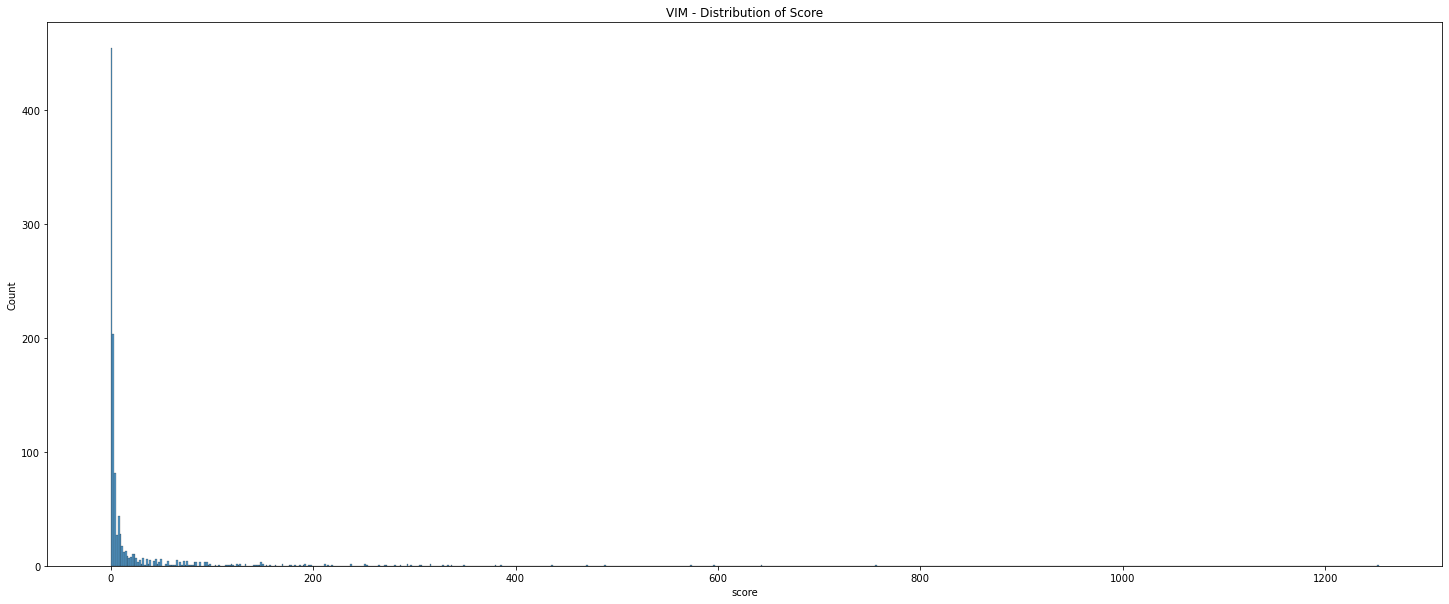

In [12]:
# Score distribution in Vim subreddit

print("Highest number of score on VIM posts : " + str(max(df_vim['score'])))

plt.figure(figsize=(25,10))
sns.histplot(data=df_vim, x="score").set_title("VIM - Distribution of Score")

In [13]:
# Replacing not false values in coloumn 'edited' with "True"

for num in range(len(df_emacs['edited'])):
    if df_emacs['edited'][num] != 'False':
        df_emacs['edited'][num] = 'True'
        
for num in range(len(df_vim['edited'])):
    if df_vim['edited'][num] != 'False':
        df_vim['edited'][num] = 'True'

<ipython-input-13-8c7d54a90868>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emacs['edited'][num] = 'True'
<ipython-input-13-8c7d54a90868>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vim['edited'][num] = 'True'


In [14]:
data = [['emacs',df_emacs.loc[df_emacs.edited == 'True', 'edited'].count(), df_emacs.loc[df_emacs.edited == 'False', 'edited'].count()], ['vim', df_vim.loc[df_vim.edited == 'True', 'edited'].count(), df_vim.loc[df_vim.edited == 'False', 'edited'].count()]] 
df = pd.DataFrame(data, columns = ['subreddit', 'Edited Posts', 'Not Edited Posts'])

In [15]:
((df['Edited Posts'][0])/(df['Edited Posts'][0] + df['Not Edited Posts'][0]))*100

19.022556390977442

EMACS - % of edited posts : 19.022556390977442
VIM   - % of edited posts : 15.670289855072465


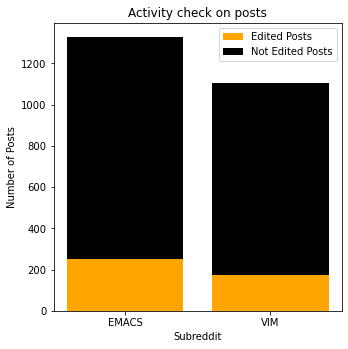

In [16]:
print("EMACS - % of edited posts : " + str(((df['Edited Posts'][0])/(df['Edited Posts'][0] + df['Not Edited Posts'][0]))*100))
print("VIM   - % of edited posts : " + str(((df['Edited Posts'][1])/(df['Edited Posts'][1] + df['Not Edited Posts'][1]))*100))

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(['EMACS', 'VIM'], df['Edited Posts'], color='orange')
ax.bar(['EMACS', 'VIM'], df['Not Edited Posts'], bottom=df['Edited Posts'], color='black')
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Subreddit')
ax.set_title('Activity check on posts')
ax.legend(labels=['Edited Posts', 'Not Edited Posts'])

In [17]:
# Average upvote ratio for 'emacs' subreddit
emacs_avg_upvote_ratio = sum(df_emacs['upvote_ratio']) / len(df_emacs['upvote_ratio'])
print("Average Upvote Ratio for EMACS : " + str(emacs_avg_upvote_ratio))

# Average upvote ratio for 'vim' subreddit
vim_avg_upvote_ratio = sum(df_vim['upvote_ratio']) / len(df_vim['upvote_ratio'])
print("Average Upvote Ratio for VIM   : " + str(vim_avg_upvote_ratio))

Average Upvote Ratio for EMACS : 0.9110601503759406
Average Upvote Ratio for VIM   : 0.7522826086956524


In [18]:
# Average score for 'emacs' subreddit
emacs_avg_score = sum(df_emacs['score']) / len(df_emacs['score'])
print("Average Score for EMACS : " + str(emacs_avg_score))

# Average score for 'vim' subreddit
vim_avg_score = sum(df_vim['score']) / len(df_vim['score'])
print("Average Score for VIM   : " + str(vim_avg_score))

Average Score for EMACS : 15.34812030075188
Average Score for VIM   : 25.082427536231883


In [19]:
num_to_month = {'01':'January', '02':'February', '03':'March', '04':'April', '06':'June', '07':'July', '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'}

# EMACS ------------------------------------

month_created = []
for num in range(len(df_emacs['created'])):
    utc_date = df_emacs['created'][num]
    month_created.append(num_to_month[str(arrow.get(utc_date).to('local').format())[5:7]])

# Adding 'month_created' column to df_emacs
df_emacs['month_created'] = month_created


# Vim ---------------------------------------

month_created = []
for num in range(len(df_vim['created'])):
    utc_date = df_vim['created'][num]
    month_created.append(num_to_month[str(arrow.get(utc_date).to('local').format())[5:7]])

# Adding 'month_created' column to df_emacs
df_vim['month_created'] = month_created

In [20]:
# df_emacs - updated dataframe

df_emacs.head()

,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created,month_created
0,NaN,Is it possible to create vision boards on Emacs ?,1.00,False,False,12,frvy6n,emacs,https://www.reddit.com/r/emacs/comments/frvy6n...,12,[deleted],1.585621e+09,March
1,Ayrat555,I wrote a post about org-habit that can be use...,0.96,False,False,20,frvtk3,emacs,https://www.badykov.com/common/2020/03/29/a-ma...,3,NaN,1.585620e+09,March
2,PriorOutcome,View Minecraft Worlds in Emacs,0.96,False,False,73,frvtjg,emacs,https://www.reddit.com/r/emacs/comments/frvtjg...,13,&#x200B;\n\nhttps://preview.redd.it/y8w6lt7onu...,1.585620e+09,March
3,Hagge5,Getting rid of extraneous emacs bindings when ...,0.81,False,True,6,frrny3,emacs,https://www.reddit.com/r/emacs/comments/frrny3...,18,"Hi,\n\nI'm attempting to learn evil-mode with ...",1.585607e+09,March
4,FormerAct,Effort estimate of parent header from subheaders,1.00,False,False,2,frrnd8,emacs,https://www.reddit.com/r/emacs/comments/frrnd8...,2,I am getting crazy in order to get this... Do ...,1.585607e+09,March


In [21]:
# df_vim - updated dataframe

df_vim.head()

,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created,month_created
0,justrajdeep,Titlestring format,0.67,False,False,1,fruugj,vim,https://www.reddit.com/r/vim/comments/fruugj/t...,1,Hi Vimmers\n\nCan someone please explain me ho...,1.585617e+09,March
1,justrajdeep,A Few Vim Plugins That Have Impressed Me Recently,0.42,False,False,0,frurk2,vim,https://www.youtube.com/watch?v=RGOsE3UWqhI,4,NaN,1.585617e+09,March
2,mugnozzo,Why I switched from Emacs to Vi(m),0.83,False,False,11,frsghk,vim,https://www.reddit.com/r/vim/comments/frsghk/w...,24,First of all: I've never taken part in the Vi(...,1.585610e+09,March
3,PresentPickleNinja,iI've gotten to the point where muscle memory ...,0.94,False,False,334,frqmx2,vim,https://www.reddit.com/r/vim/comments/frqmx2/i...,103,iI'm not kidding. It's becoming a problem.:wq,1.585603e+09,March
4,pouponne,For your best shopping experiences,1.00,False,False,1,frq7lp,vim,https://www.reddit.com/r/vim/comments/frq7lp/f...,1,[removed],1.585601e+09,March


EMACS - Number of Posts / Month : 

January     486
March       433
February    411
Name: month_created, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000003D19C82B20>],
      dtype=object)

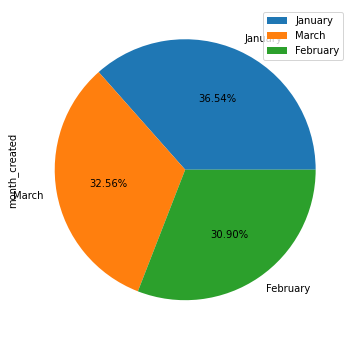

In [22]:
# Distribution of posts in r/emacs per month [jan-feb-march]

print("EMACS - Number of Posts / Month : \n")
print(df_emacs['month_created'].value_counts())

df_emacs['month_created'].value_counts().to_frame().plot.pie(autopct="%.2f%%", subplots=True, figsize=(11, 6))

In [23]:
df_emacs['month_created'].value_counts().sort_index()

February    411
January     486
March       433
Name: month_created, dtype: int64

VIM - Number of Posts / Month : 

January     377
March       376
February    351
Name: month_created, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000003D19CC9A60>],
      dtype=object)

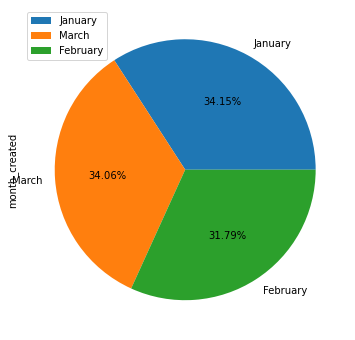

In [24]:
# Distribution of posts in r/vim per month [jan-feb-march]

print("VIM - Number of Posts / Month : \n")
print(df_vim['month_created'].value_counts())

df_vim['month_created'].value_counts().to_frame().plot.pie(autopct="%.2f%%", subplots=True, figsize=(11, 6))

In [25]:
VIM = df_vim['month_created'].value_counts().tolist()
#VIM['January']
#VIM = VIM.reset_index(drop=True)
#print(VIM['0'])
VIM

[377, 376, 351]

Text(0.5, 1.0, 'Monthwise Comparision of Posts [emacs - vim]')

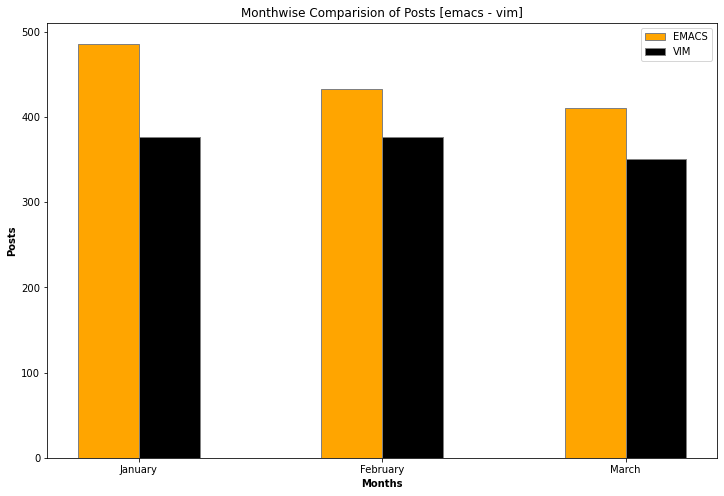

In [26]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, df_emacs['month_created'].value_counts().tolist(), color ='orange', width = barWidth, 
        edgecolor ='grey', label ='EMACS') 
plt.bar(br2, df_vim['month_created'].value_counts().tolist(), color ='black', width = barWidth, 
        edgecolor ='grey', label ='VIM')

plt.xlabel('Months', fontweight ='bold') 
plt.ylabel('Posts', fontweight ='bold') 
plt.xticks([r + barWidth - 0.125 for r in range(len(df_vim['month_created'].value_counts().tolist()))], 
           ['January', 'February', 'March'])
plt.legend(labels=['EMACS', 'VIM']) 
plt.title("Monthwise Comparision of Posts [emacs - vim]")

In [27]:
#Checking if there are any common authors between emacs and vim

emacs_authors = df_emacs['author'].unique()
vim_authors = df_vim['author'].unique()

print("EMACS - Number of authors : " + str(len(emacs_authors)))
print("VIM - Number of authors   : " + str(len(vim_authors)) + "\n\n")

cnt = 0
print("Common authors : ")
for author_name in emacs_authors:
    if author_name in vim_authors:
        cnt += 1
        print(author_name)
        
print("\nNumber of Common Authors : " + str(cnt))

EMACS - Number of authors : 672
VIM - Number of authors   : 638


Common authors : 
yep808
tldrthestoryofmylife
asheq100
ghostinzshell
chrismg12
aksh2161989
ixlxixl
sbay
Shady980
guguts
Reasintper
en3r0
l33tpolymath
kakiopolis
Martinsos
Godnyx117
ellipticcode0
eva_kuator
speckz
Oracolus
RageCage64
akulichevskiy
joselitux

Number of Common Authors : 23


In [28]:
# Counting the number of comments in each subreddit

print("EMACS - Number of comments : " + str(sum(df_emacs['num_comments'])))
print("VIM - Number of comments   : " + str(sum(df_vim['num_comments'])))

# Average comments for each subreddit

print("\n\nEMACS - Average comments : " + str(sum(df_emacs['num_comments'])//len(df_emacs['num_comments'])))
print("VIM - Average comments   : " + str(sum(df_vim['num_comments'])//len(df_vim['num_comments'])))

EMACS - Number of comments : 12375
VIM - Number of comments   : 12084


EMACS - Average comments : 9
VIM - Average comments   : 10
